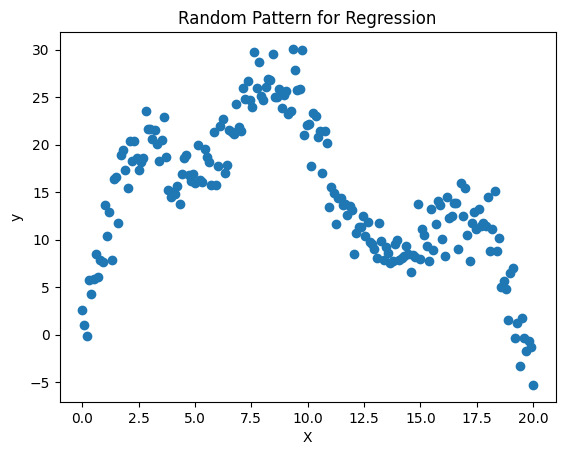

In [17]:
#Creating random pattern for regression 
import numpy as np
import matplotlib.pyplot as plt
# Generate x values
x = np.linspace(0, 20, 200)

# Mountain pattern: combination of sine waves + gaussian peaks + noise
y = (15 * np.sin(0.3*x) * np.exp(-0.05*x) + 
     20 * np.exp(-((x-7)**2)/8) + 
     25 * np.exp(-((x-14)**2)/10) +
     10 * np.sin(0.8*x) +
     np.random.normal(0, 2, len(x)))
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Random Pattern for Regression")
plt.show()

Mean Squared Error: 17.382744100769383
R2 Score: 0.6263706008401327


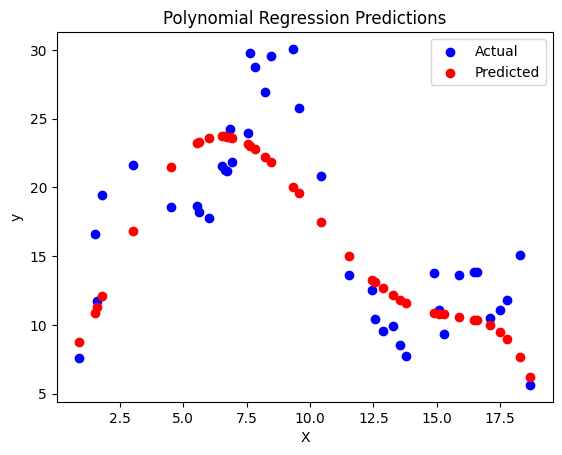

In [23]:
#Trying linear regression with polynomial features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = x.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly_features = PolynomialFeatures(degree=5)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
y_pred = lin_reg.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
#r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
#Plotting actual vs predicted
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Predictions")
plt.legend()
plt.show()

Decision Tree Mean Squared Error: 8.204841457437096
Decision Tree R2 Score: 0.8236429204633746


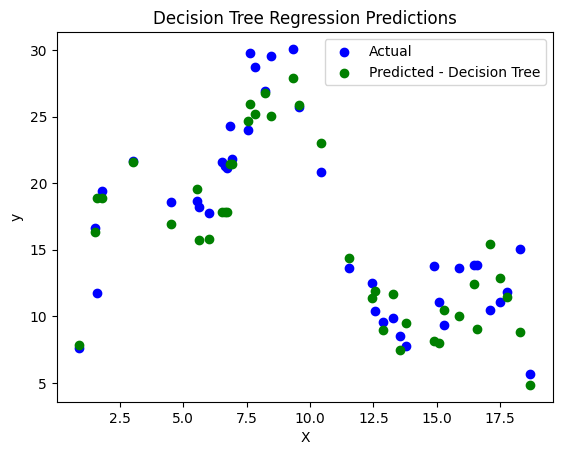

In [24]:
#Trying decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Mean Squared Error:", mse_dt)
print("Decision Tree R2 Score:", r2_dt)
#Plotting actual vs predicted for decision tree
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_dt, color='green', label='Predicted - Decision Tree')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regression Predictions")
plt.legend()
plt.show()

In [18]:
#Prediction using Bagging Regressor with GridSearch CV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
#Importing Linear Regression and GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'estimator': [DecisionTreeRegressor(), LinearRegression()],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

In [19]:
#Training Regressor 
grid_search = GridSearchCV(BaggingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x.reshape(-1, 1), y)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': True, 'bootstrap_features': True, 'estimator': DecisionTreeRegressor(), 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}


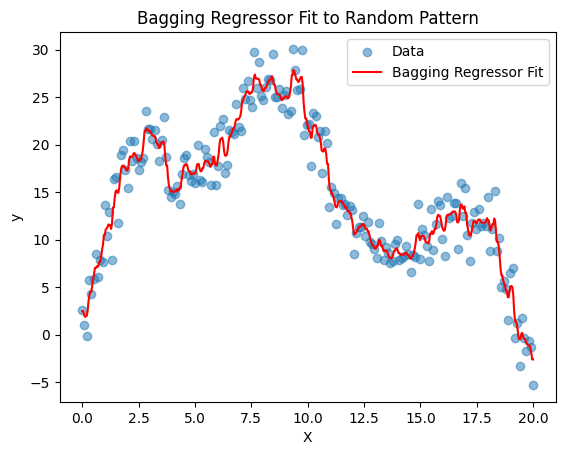

In [20]:
#Plotting the results
import matplotlib.pyplot as plt
x_fit = np.linspace(0, 20, 500)
y_fit = grid_search.predict(x_fit.reshape(-1, 1))
plt.scatter(x, y, label='Data', alpha=0.5)
plt.plot(x_fit, y_fit, color='red', label='Bagging Regressor Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Bagging Regressor Fit to Random Pattern")
plt.legend()
plt.show()

In [21]:
#printing r2 score
from sklearn.metrics import r2_score
y_pred = grid_search.predict(x.reshape(-1, 1))
print("R2 Score:", r2_score(y, y_pred)) 

R2 Score: 0.9610806321421964
